### imports

In [1]:
import pickle
import numpy as np
import scipy
import matplotlib.pyplot as plt
from skimage.filters import sobel
from skimage.segmentation import watershed
from skimage import filters
import seaborn as sns
from scipy import ndimage as ndi
from skimage import *
# import seaborn as sns
# import pandas as pd

### settings

In [2]:
sns.set_style('white')
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 2}

# matplotlib.rc('font', **font)
# matplotlib.rcParams.update({'font.size': 2})

import matplotlib.pyplot as plt

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title






### functions

In [3]:
with open('/home/yzy/bioSIMS/data/Segment_Cut/Cut_256.pickle', 'rb') as handle:
    Cut_mask_dict = pickle.load(handle)
with open('/home/yzy/bioSIMS/data/Segment_SIMS/SIMS_256_rotation.pickle', 'rb') as handle:
    SIMS_dict = pickle.load(handle)
with open('/home/yzy/bioSIMS/data/Segment_Human_256/Human_256_int.pickle', 'rb') as handle:
    Human_mask_dict = pickle.load(handle)

In [18]:
from skimage.segmentation import random_walker
def RW(test_tissue,k):
    
    init_class=k
    image = SIMS_dict[test_tissue].copy()
    image = (image-image.min())/(image.max()-image.min())
    image = image*2-1
    thresholds = filters.threshold_multiotsu(image, classes=init_class)
    markers = np.zeros_like(image)
    #     find sure bg and fg
    markers[image>thresholds[-1]]=2
    markers[image<thresholds[0]]=1

    labels = random_walker(image, markers, beta=10, mode='cg')-1
    segmented_cells, _ = ndi.label(labels)
    return segmented_cells

In [8]:
labels = RW('R1',2)

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)


In [21]:
RW_mask_dict = {}


/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)


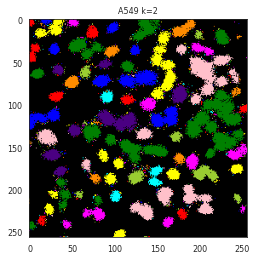

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


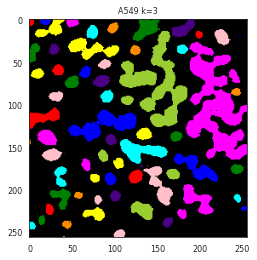

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


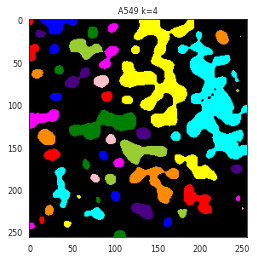

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


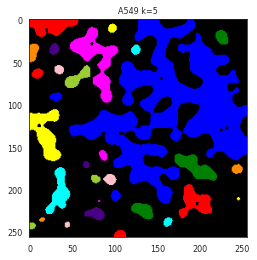

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)


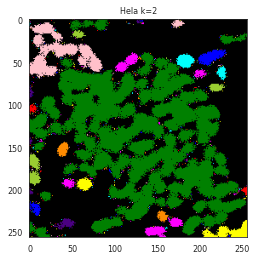

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


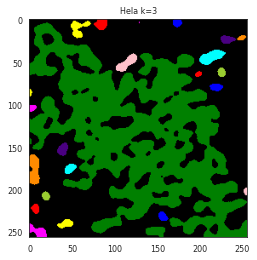

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


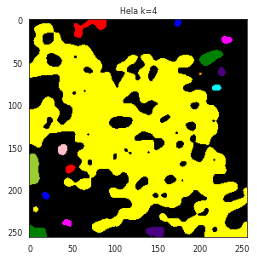

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


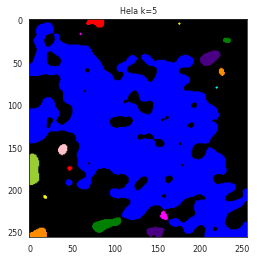

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)


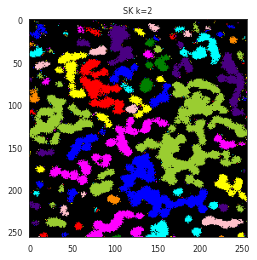

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


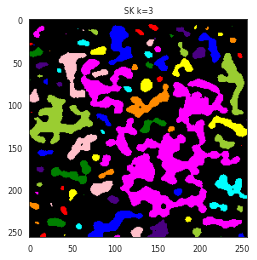

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


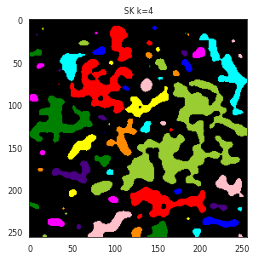

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


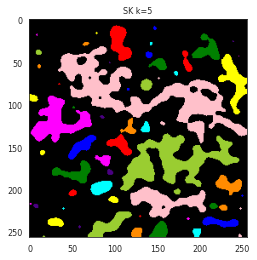

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)


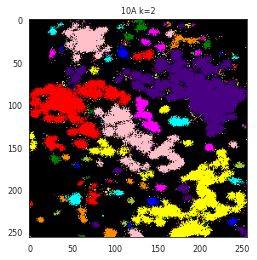

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


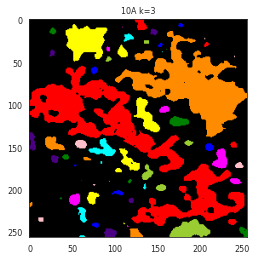

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


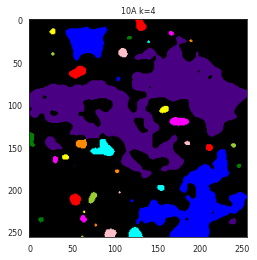

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


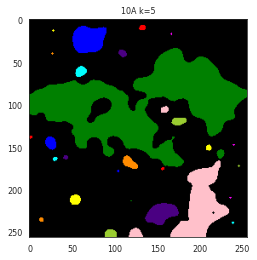

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)


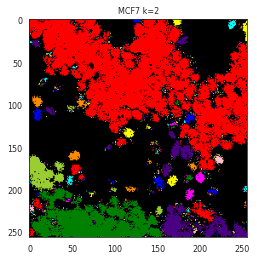

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


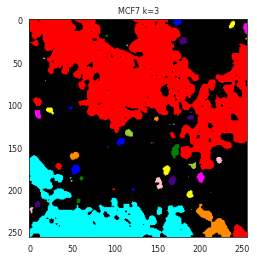

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


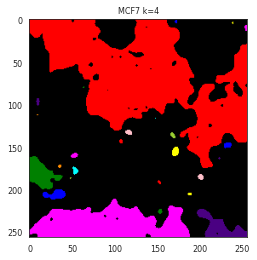

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


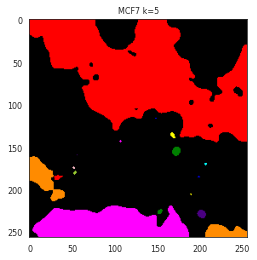

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)


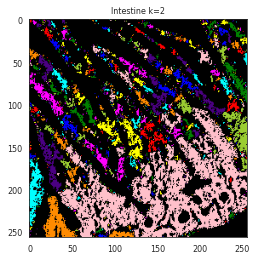

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


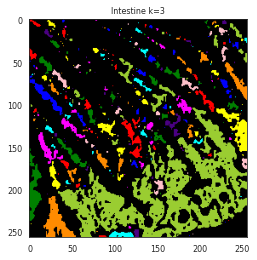

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


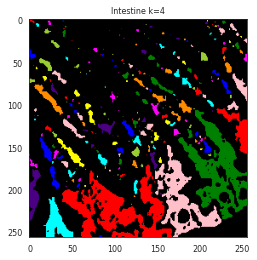

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


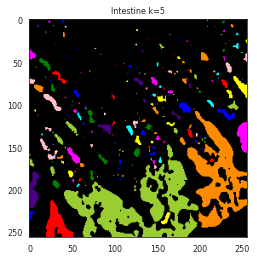

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)


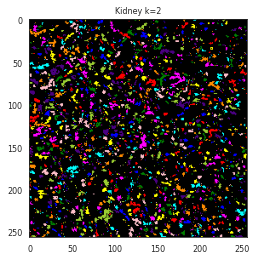

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


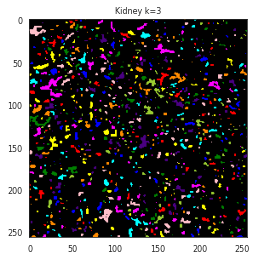

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


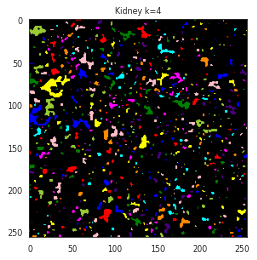

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


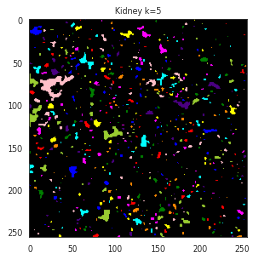

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)


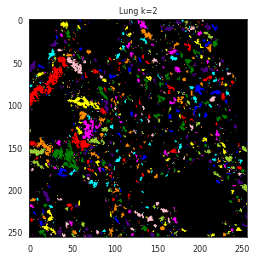

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


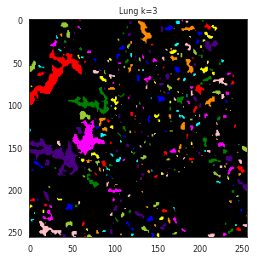

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


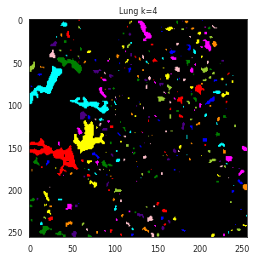

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


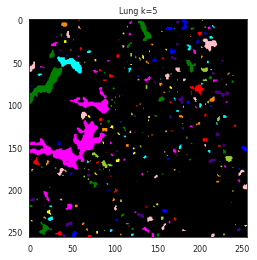

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)


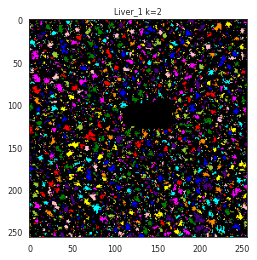

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


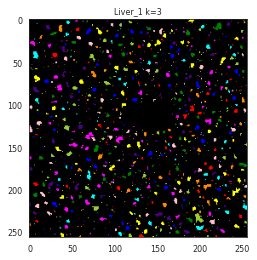

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


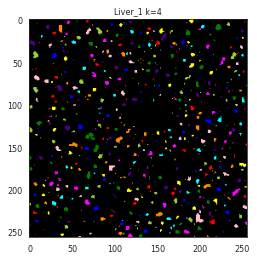

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


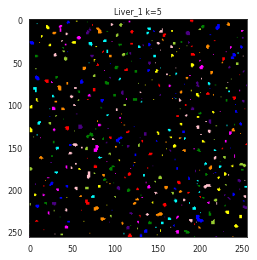

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)


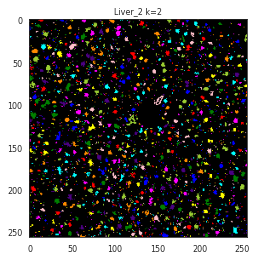

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


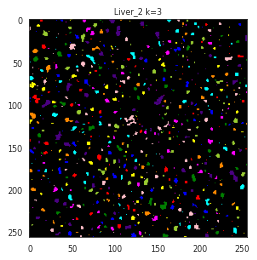

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


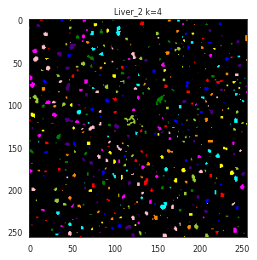

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


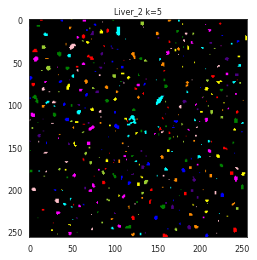

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)


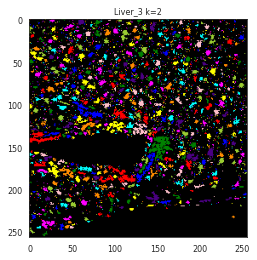

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


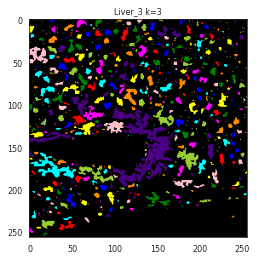

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


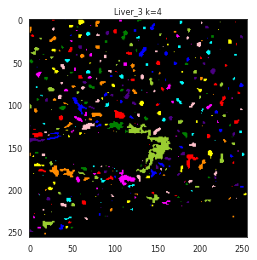

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


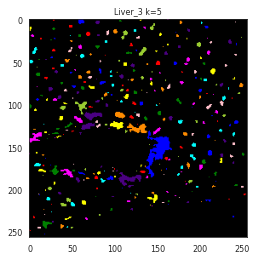

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)


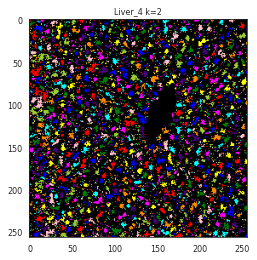

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


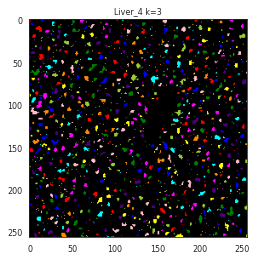

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


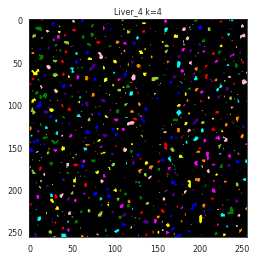

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


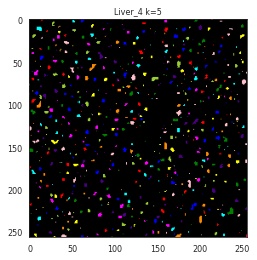

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)


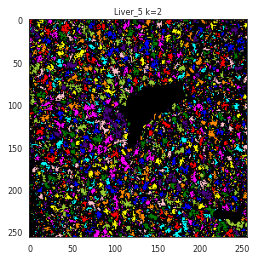

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


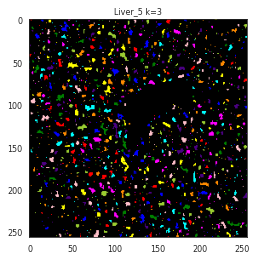

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


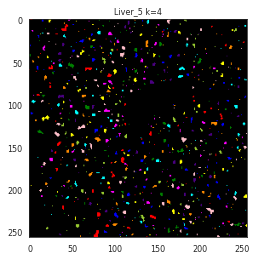

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


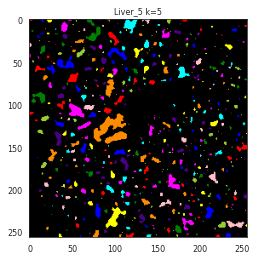

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)


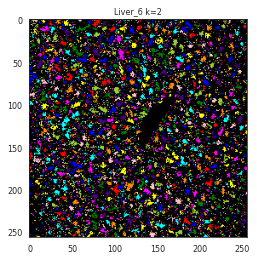

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


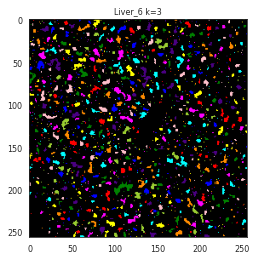

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


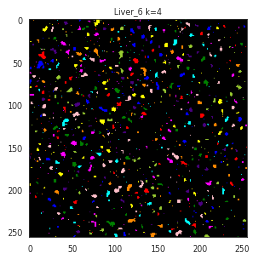

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


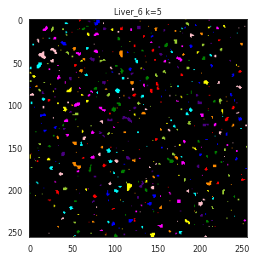

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)


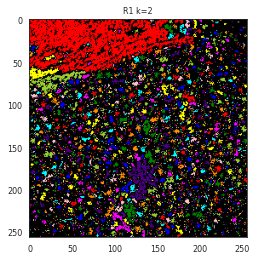

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


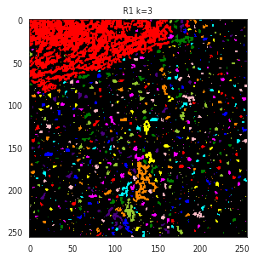

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


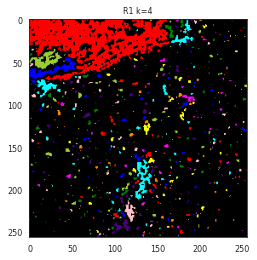

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


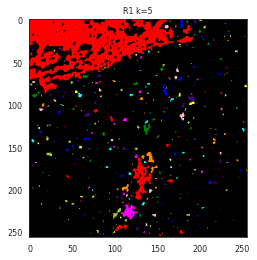

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)


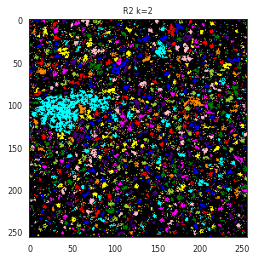

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


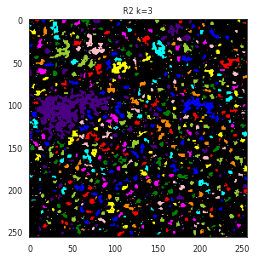

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


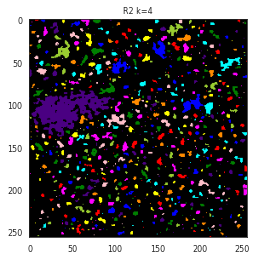

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


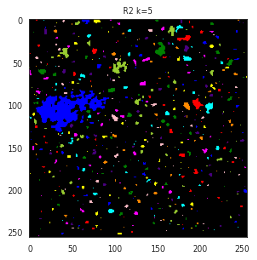

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)


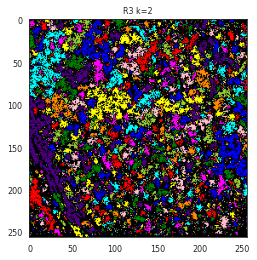

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


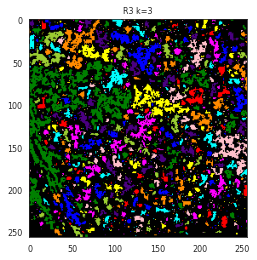

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


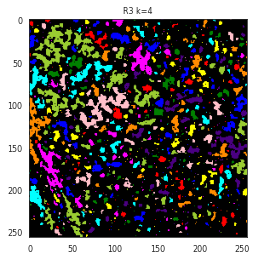

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


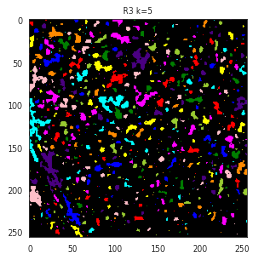

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)


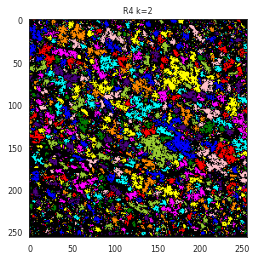

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


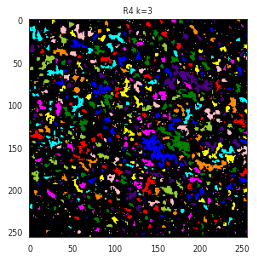

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


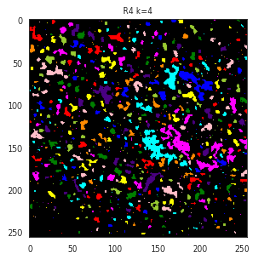

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


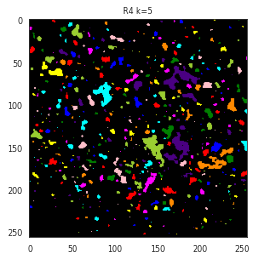

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)


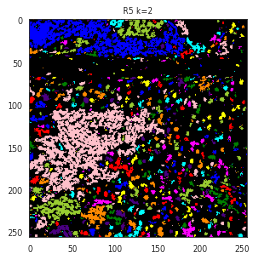

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


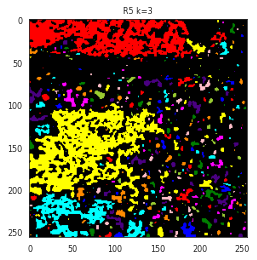

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


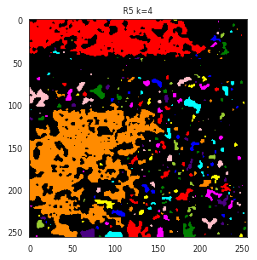

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


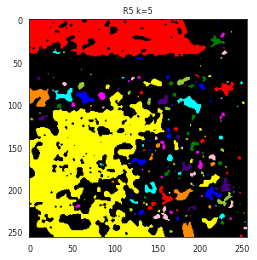

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)


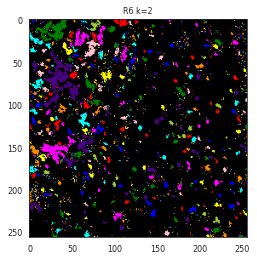

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


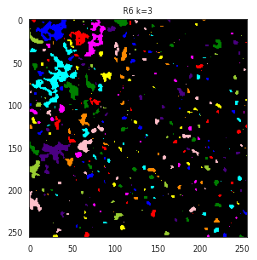

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


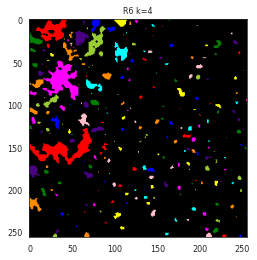

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


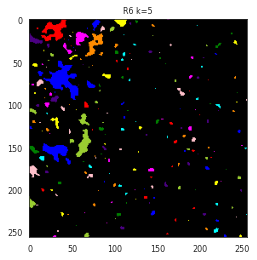

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)


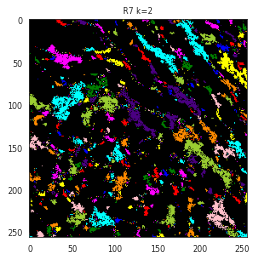

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


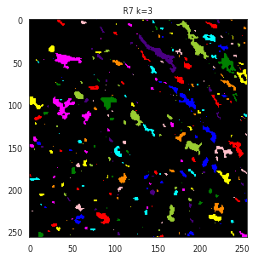

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


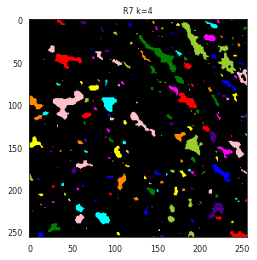

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


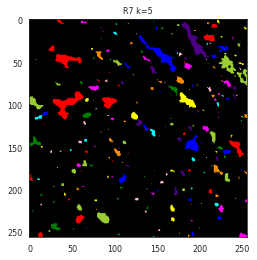

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)


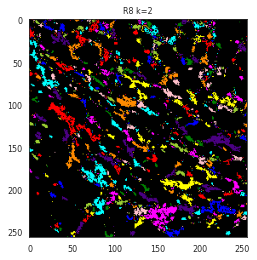

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


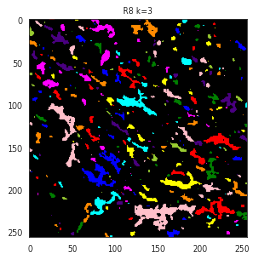

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


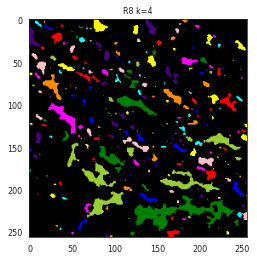

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


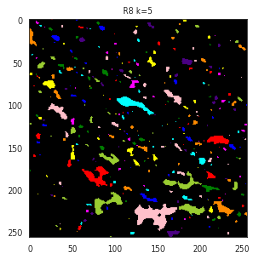

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)


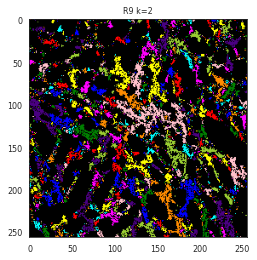

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


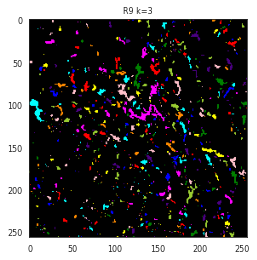

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


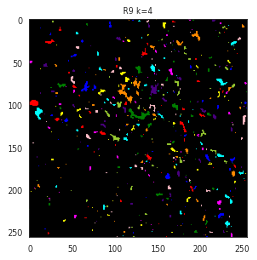

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


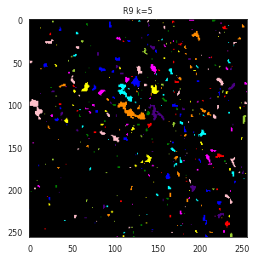

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)


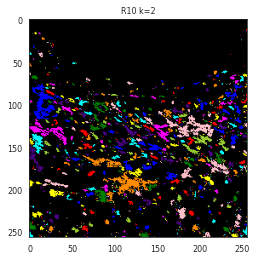

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


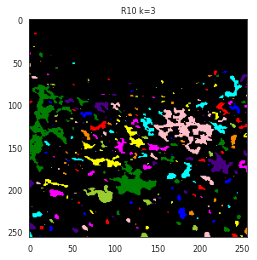

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


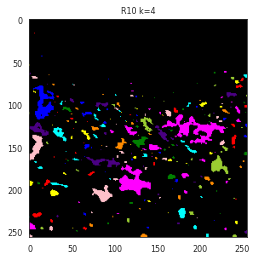

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/segmentation/random_walker_segmentation.py:489: UserWarning: "cg" mode may be slow because UMFPACK is not available. Consider building Scipy with UMFPACK or use a preconditioned version of CG ("cg_j" or "cg_mg" modes).
  X = _solve_linear_system(lap_sparse, B, tol, mode)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  


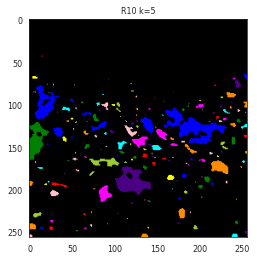

In [22]:
tissue_list = [
    'A549','Hela','SK','10A','MCF7',
    'Intestine','Kidney','Lung',
    'Liver_1','Liver_2','Liver_3','Liver_4','Liver_5','Liver_6',
    'R1','R2','R3','R4','R5','R6','R7','R8','R9','R10'
]
k_range = [2,3,4,5]
for test_tissue in tissue_list:
    RW_mask_dict[test_tissue] = {}
    
    for k in k_range:
        img = SIMS_dict[test_tissue]
        RW_rst = RW(test_tissue,k)
        
        RW_mask_dict[test_tissue][k]=RW_rst
        
        
        plt.imshow(color.label2rgb(RW_rst,bg_label=0))
        plt.title('{0} k={1}'.format(test_tissue,str(k)))
        plt.show()

In [23]:
with open('/home/yzy/bioSIMS/data/Segment_RW/WR_mask.pickle', 'wb') as handle:
    pickle.dump(RW_mask_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
    


In [ ]:
1+1